Truck 1 arriving at 38.82 minutes
Truck 1 being serviced at 38.82 minutes, service time: 10.00 minutes
Truck 1 leaves at 48.82 minutes

Truck 2 arriving at 70.82 minutes
Truck 2 being serviced at 70.82 minutes, service time: 5.04 minutes
Truck 2 leaves at 75.87 minutes

Truck 3 arriving at 110.16 minutes
Truck 3 being serviced at 110.16 minutes, service time: 10.00 minutes
Truck 3 leaves at 120.16 minutes

Truck 4 arriving at 135.27 minutes
Truck 4 being serviced at 135.27 minutes, service time: 5.19 minutes
Truck 4 leaves at 140.46 minutes

Truck 5 arriving at 165.99 minutes
Truck 5 being serviced at 165.99 minutes, service time: 10.00 minutes
Truck 5 leaves at 175.99 minutes

Truck 6 arriving at 203.26 minutes
Truck 6 being serviced at 203.26 minutes, service time: 9.95 minutes
Truck 6 leaves at 213.21 minutes

Truck 7 arriving at 235.48 minutes
Truck 7 being serviced at 235.48 minutes, service time: 5.96 minutes
Truck 7 leaves at 241.45 minutes

Truck 8 arriving at 267.15 minutes
Tr

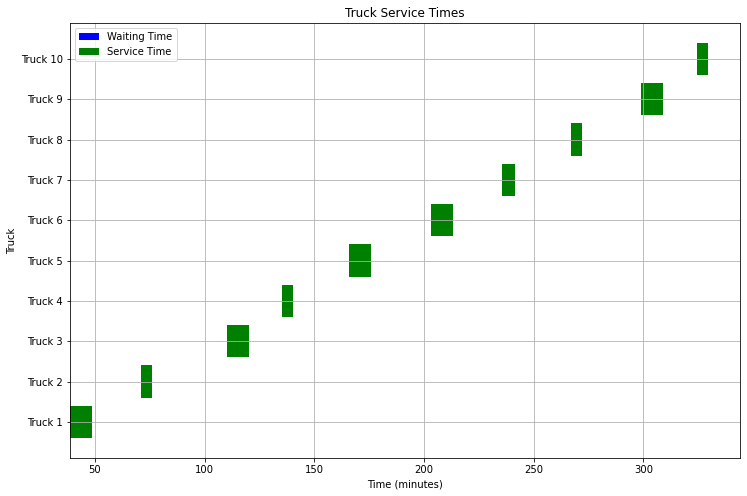

In [15]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

def truck(env, name, operator, alpha, beta, min_service_time, max_service_time):
    arrival_time = env.now
    print(f"{name} arriving at {arrival_time:.2f} minutes")

    with operator.request() as req:
        yield req
        start_service_time = env.now
        beta_value = np.random.beta(alpha, beta)
        service_time = min_service_time + beta_value * (max_service_time - min_service_time)
        print(f"{name} being serviced at {start_service_time:.2f} minutes, service time: {service_time:.2f} minutes")
        yield env.timeout(service_time)
        departure_time = env.now
        print(f"{name} leaves at {departure_time:.2f} minutes")
        truck_logs.append((name, arrival_time, start_service_time, departure_time))
        print()

def operator_shift(env, num_trucks, interarrival_time_sigma, alpha, beta, min_service_time, max_service_time):
    operator = simpy.Resource(env, capacity=1)
    for i in range(1, num_trucks + 1):
        yield env.timeout(np.random.normal(30, interarrival_time_sigma))
        env.process(truck(env, f'Truck {i}', operator, alpha, beta, min_service_time, max_service_time))

env = simpy.Environment()
np.random.seed(0)

# Simulation parameters
num_trucks = 10
interarrival_time_sigma = 5  
alpha_beta = 0.11589477324807883  # Beta distribution alpha parameter
beta_beta = 0.04726998868832212   # Beta distribution beta parameter
min_service_time = 5  # Minimum service time in minutes
max_service_time = 10  # Maximum service time in minutes

# Store the logs for Gantt chart
truck_logs = []

# Start the simulation
env.process(operator_shift(env, num_trucks, interarrival_time_sigma, alpha_beta, beta_beta, min_service_time, max_service_time))
env.run(until=480)  # Run for 480 minutes (8 hours)

# Gantt Chart
truck_names = [log[0] for log in truck_logs]
arrival_times = [log[1] for log in truck_logs]
start_service_times = [log[2] for log in truck_logs]
departure_times = [log[3] for log in truck_logs]

plt.figure(figsize=(12, 8))
for i in range(len(truck_logs)):
    plt.barh(truck_names[i], start_service_times[i] - arrival_times[i], left=arrival_times[i], color='blue')
    plt.barh(truck_names[i], departure_times[i] - start_service_times[i], left=start_service_times[i], color='green')

plt.xlabel('Time (minutes)')
plt.ylabel('Truck')
plt.title('Truck Service Times')
plt.legend(['Waiting Time', 'Service Time'])
plt.grid(True)
plt.show()


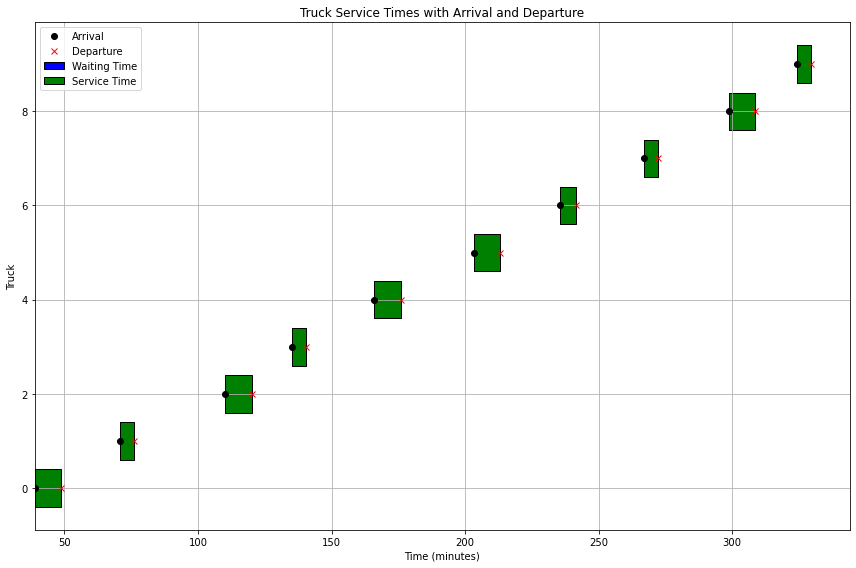

In [18]:
import matplotlib.pyplot as plt


truck_names = [log[0] for log in truck_logs]
arrival_times = [log[1] for log in truck_logs]
service_starts = [log[2] for log in truck_logs]
service_durations = [log[3] - log[2] for log in truck_logs]
waiting_times = [log[2] - log[1] for log in truck_logs]


plt.figure(figsize=(12, 8))


offset = {name: idx for idx, name in enumerate(truck_names)}


for i, name in enumerate(truck_names):
    plt.barh(offset[name], waiting_times[i], left=arrival_times[i], color='blue', edgecolor='black', label='Waiting Time' if i == 0 else "")


for i, name in enumerate(truck_names):
    plt.barh(offset[name], service_durations[i], left=service_starts[i], color='green', edgecolor='black', label='Service Time' if i == 0 else "")


for i, name in enumerate(truck_names):
    plt.plot(arrival_times[i], offset[name], 'ko', label='Arrival' if i == 0 else "")  
    plt.plot(service_starts[i] + service_durations[i], offset[name], 'rx', label='Departure' if i == 0 else "")  


plt.legend()

plt.xlabel('Time (minutes)')
plt.ylabel('Truck')
plt.title('Truck Service Times with Arrival and Departure')
plt.grid(True)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


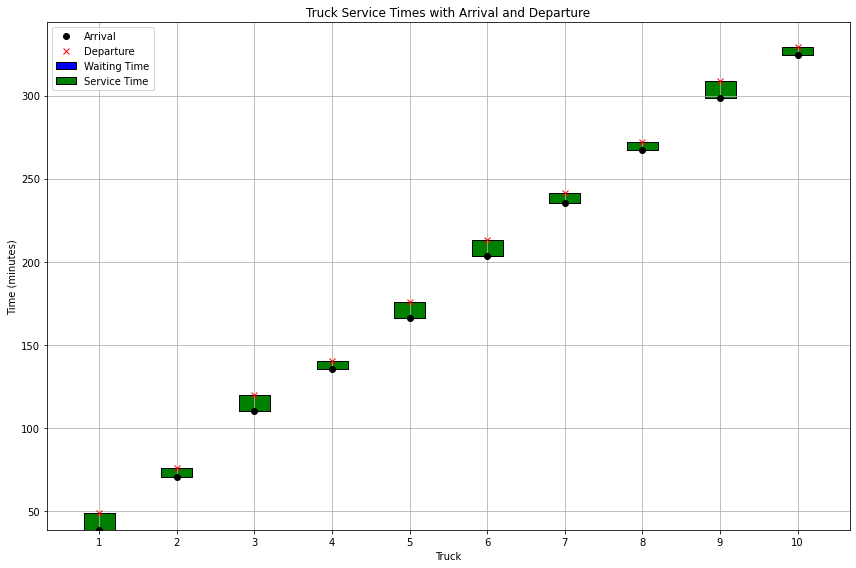

In [19]:
import matplotlib.pyplot as plt


truck_ids = range(1, len(truck_logs) + 1) 
arrival_times = [log[1] for log in truck_logs]
service_starts = [log[2] for log in truck_logs]
service_durations = [log[3] - log[2] for log in truck_logs]
waiting_times = [log[2] - log[1] for log in truck_logs]


plt.figure(figsize=(12, 8))


for i, truck_id in enumerate(truck_ids):
    plt.bar(truck_id, waiting_times[i], bottom=arrival_times[i], width=0.4, color='blue', edgecolor='black', align='center', label='Waiting Time' if i == 0 else "")


for i, truck_id in enumerate(truck_ids):
    plt.bar(truck_id, service_durations[i], bottom=service_starts[i], width=0.4, color='green', edgecolor='black', align='center', label='Service Time' if i == 0 else "")


for i, truck_id in enumerate(truck_ids):
    plt.plot(truck_id, arrival_times[i], 'ko', label='Arrival' if i == 0 else "")  
    plt.plot(truck_id, service_starts[i] + service_durations[i], 'rx', label='Departure' if i == 0 else "") 


plt.legend()

plt.ylabel('Time (minutes)')
plt.xlabel('Truck')
plt.title('Truck Service Times with Arrival and Departure')
plt.grid(True)
plt.tight_layout()  
plt.xticks(truck_ids)  
plt.show()
